This analysis is performed **to examine the effects of various features on the sale price of houses located in different regions of U.S.A.**. In order to make this happen, the following steps are taken.

## 1. Dataset
The key step of every data analysis challange is finding a way to obtain trustable and appropriate information being completely relevant to that project. Conducting online and in-person questionnaire surveys, studying relevant academic papers, and surfing the most popular website in this field, www.kaggle.com, are the most common approaches being adopted by researchers and engineers to construct useful datasets. **Therefore, an existing dataset from Kaggele (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) is chosen to perform a through analysis for the current project.**

In [1]:
#pip install tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from feature_handler import FeatureHandler as FH

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Data/TrainSet.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**"Id" has no effect on the sale price of a house, so therefore, it is removed from the dataset.**

In [3]:
df.drop("Id", axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Below, all features of the current dataset are listed:**

In [4]:
def print_array(arr, ncols = 5, padding = 20):
    nrows = math.ceil(len(arr) / ncols)
    for i in range(nrows):
        c_idx = i * ncols
        new_tuple = arr[c_idx: c_idx + ncols]
        for col in new_tuple:
            print('\033[1m' + f"{col:{padding}}", end = "")
        print("\n")
        
print_array(list(df.columns), 6)

MSSubClass          MSZoning            LotFrontage         LotArea             Street              Alley               

LotShape            LandContour         Utilities           LotConfig           LandSlope           Neighborhood        

Condition1          Condition2          BldgType            HouseStyle          OverallQual         OverallCond         

YearBuilt           YearRemodAdd        RoofStyle           RoofMatl            Exterior1st         Exterior2nd         

MasVnrType          MasVnrArea          ExterQual           ExterCond           Foundation          BsmtQual            

BsmtCond            BsmtExposure        BsmtFinType1        BsmtFinSF1          BsmtFinType2        BsmtFinSF2          

BsmtUnfSF           TotalBsmtSF         Heating             HeatingQC           CentralAir          Electrical          

1stFlrSF            2ndFlrSF            LowQualFinSF        GrLivArea           BsmtFullBath        BsmtHalfBath        

FullBath            Half

## 2. Feature Investigation
It is critical for data anlysts to find clear comprehensions about every different features being used in the dataset on which they are working. In this regard, there must be technical discussions between clients and data analysts to get as much information as possible about the dataset. In some cases, it is required for data anlysts to conduct some market research to be fully aware of the meaning of every different features in the relevant industry. **Kaggle, itself, provideded us  with informative details and useful information regarding all features (keys and values) being used in the current dataset. For more information you are referred to an exisiting text file, data_description.txt, at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data**

The features of the current dataset are classified as follows:

1. Variables decribing `geographical characteristics of the neighbour`:
    - General zoning classification of the of building (`MSZoning`)
    - Type of road/alley access (`Street/Alley`)
    - Physical locations within Ames city limits (`Neighborhood`)
    - proximity to various conditions (`Condition`)
    
    
2. Variables describing `geographical Characteristics of the building`
    - Linear feet of street connected to property (`LotFrontage`)
    - Lot size in square feet (`LotArea`)
    - General shape of property (`LotShape`)
    - Flatness of the property (`LandContour`) 
    - Lot configuration (`LotConfig`)
    - Slope of property (`LandSlope`)
    - Type of roof (`RoofStyle`)
    - Evaluates the height of the basement (`BsmtQual`)
    - Finished square feet of basement area (`BsmtFinSF`)
    - Unfinished square feet of basement area (`BsmtUnfSF`)
    - Total square feet of basement area (`TotalBsmtSF`)
    - First Floor square feet (`1stFlrSF`)
    - Second floor square feet (`2ndFlrSF`)
    - Low quality finished square feet for all floors (`LowQualFinSF`)
    - Above grade living area square feet (`GrLivArea`)
    - Garage location (`GarageType`)
    - Interior finish of the garage (`GarageFinish`)
    - Size of garage in car capacity (`GarageCars`)
    - Size of garage in square feet (`GarageArea`)
    - Wood deck area in square feet (`WoodDeckSF`)
    - Open porch area in square feet (`OpenPorchSF`)
    - Enclosed porch area in square feet (`EnclosedPorch`)
    - Three season porch area in square feet (`3SsnPorch`)
    - Screen porch area in square feet (`ScreenPorch`)
    - Pool area in square feet (`PoolArea`)
    

3. Variables describing `dwelling type of the place in which a house is located`
    - Type of dwelling involved in the sale (`MSSubClass`)
    - Type of dwelling (`BldgType`)
    - Style of dwelling (`HouseStyle`)
    
    
4. Variables describing `sale Condition of the house`
    - Type of sale (`SaleType`)
    - Condition of sale (`SaleCondition`)
    - Month Sold (`MoSold`)
    - Year Sold (`YrSold`)
    
    
5. Variables describing `facilities of the home`
    - Type of utilities available (`Utilities`)
    - Type of heating (`Heating`)
    - Heating quality and condition (`HeatingQC`)
    - Central air conditioning (`CentralAir`)
    - Electrical system (`Electrical`)
    - Number of fireplaces (`Fireplaces`)
    - Fireplace quality (`FireplaceQu`)
    - Miscellaneous feature not covered in other categories (`MiscFeature`)
    - Value of miscellaneous feature (`MiscVal`)
     
     
6. Variables determining `dates of the construction`
    - Original construction date (`YearBuilt`)
    - Remodel date (`YearRemodAdd`)
    - Year garage was built (`GarageYrBlt`)
    
    
7. Variables giving information about `materials being used in the building`
    - Rates the overall material and finish (`OverallQual`)
    - Exterior covering on house (`Exterior1st`)
    - Masonry veneer type (`MasVnrType`)
    - Masonry veneer area in square feet (`MasVnrArea`)
    - Evaluates the quality of the material on the exterior (`ExterQual`)
    - Evaluates the present condition of the material on the exterior (`ExterCond`)
    - Roof material (`RoofMatl`)
    - Type of foundation (`Foundation`)
    - Refers to walkout or garden level walls (`BsmtExposure`)
    - Paved driveway (`PavedDrive`)
    
    
8. Variables describing `quality of building`
    - Rates the overall condition (`OverallCond`)
    - Evaluates the general condition of the basement (`BsmtCond`)
    - Kitchen quality (`KitchenQual`)
    - Rating of basement finished area (`BsmtFinType`)
    - Home functionality (`Functiona`l)
    - Garage quality (`GarageQual`)
    - Garage condition (`GarageCond`)
    - Pool quality (`PoolQC`)
    - Fence quality (`Fence`)
    
    
9. Variables giving information about `available rooms in the home`
    - Basement full bathrooms (`BsmtFullBath`)
    - Basement half bathrooms (`BsmtHalfBath`)
    - Full bathrooms above grade (`FullBath`)
    - Half baths above grade (`HalfBath`)
    - Bedrooms above grade (`Bedroom`)
    - Kitchens above grade (`Kitchen`)
    - Total rooms above grade (`TotRmsAbvGrd`)

**Below, some useful informations are given about the features that have some missing values.**

In [5]:
FH(df).missing_info

,Var Name,Data Type,Tot Cat,Num of Missing Val,Null Percentage (%),Sample Val
0,PoolQC,Object,3,1453,99.52,Gd
1,MiscFeature,Object,4,1406,96.30,Shed
2,Alley,Object,2,1369,93.77,Grvl
3,Fence,Object,4,1179,80.75,MnPrv
4,FireplaceQu,Object,5,690,47.26,Gd
5,GarageType,Object,6,81,5.55,Attchd
6,GarageFinish,Object,3,81,5.55,Unf
7,GarageQual,Object,5,81,5.55,TA
8,GarageCond,Object,5,81,5.55,TA
9,BsmtExposure,Object,4,38,2.60,No


**Since the percentages of missing values for `PoolQC`, `MiscFeature`, `Alley`, and `Fence`, are greater than 80%, these features are removed from the dataset.**

In [6]:
df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1, inplace = True)
missing_df = FH(df).missing_info
missing_df

,Var Name,Data Type,Tot Cat,Num of Missing Val,Null Percentage (%),Sample Val
0,FireplaceQu,Object,5,690,47.26,Gd
1,GarageType,Object,6,81,5.55,Attchd
2,GarageFinish,Object,3,81,5.55,Unf
3,GarageQual,Object,5,81,5.55,TA
4,GarageCond,Object,5,81,5.55,TA
5,BsmtExposure,Object,4,38,2.60,No
6,BsmtFinType2,Object,6,38,2.60,Unf
7,BsmtQual,Object,4,37,2.53,TA
8,BsmtCond,Object,4,37,2.53,TA
9,BsmtFinType1,Object,6,37,2.53,Unf


**Moreover, according to Kaggle's information, it is deducted that the missing values of this dataset conveys special meanings. Thus, the missing values of `categorical features` are imputed by a new category called `Missing`; missing values of `LotFrontage` and `MasVnrArea` are filled by `zero (0)`; missing values of `GarageYrBlt`, referring to the homes without any garage, are imputed by a `random value` between minimum and maximum values of the same column.**

In [7]:
missing_cat = missing_df[missing_df["Data Type"] == "Object"]["Var Name"]
strategy = ["missing"] * len(missing_cat)
df = FH(df).simple_cat_imputer(cols = missing_cat, strategy = strategy, rand_seed = 42)
df["LotFrontage"].fillna(0, inplace = True)
df["MasVnrArea"].fillna(0, inplace = True)
df = FH(df).simple_num_imputer(cols = ["GarageYrBlt"], strategy = ["random"], num_is_int = [True], rand_seed = 42)
FH(df).missing_info

,Var Name,Data Type,Tot Cat,Num of Missing Val,Null Percentage (%),Sample Val


## 3. Data Preprocessing & Feature Engineering
Getting a good grasp on the dataset, data analysts are quite ready to start working on the project and it is often commenced by execution of feature engineering and data preprocessing. This is one of the most challanging steps of every data analysis projects and consequentely the adopted approaches in this step may vary person by person as well as project by project. Using our creativity, we have developed sevaral modules and packages to employ unique and practical techniques to quickly extract useful information from any kind of structured dataset. Our work at this step is summerized as follows:

#### 3.1. Target Value Investigation
This sectionis dedicated to extract some useful information regarding the distribution of target value, i.e. `Sale Price`.

In [8]:
pd.DataFrame(df["SalePrice"].describe().round())

,SalePrice
count,1460.0
mean,180921.0
std,79443.0
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


In [9]:
saleprice_discritized, quantiles = pd.qcut(df["SalePrice"], 10, labels = None, retbins = True, precision = 3, 
                                           duplicates = 'raise') 

quantiles = np.round(quantiles, 2)
intervals = []
for i in range(len(quantiles) - 1):
    intervals.append(f"[{quantiles[i]}, {quantiles[i + 1]})")

print_array(intervals, 1)

[34900.0, 106475.0) 

[106475.0, 124000.0)

[124000.0, 135500.0)

[135500.0, 147000.0)

[147000.0, 163000.0)

[163000.0, 179280.0)

[179280.0, 198620.0)

[198620.0, 230000.0)

[230000.0, 278000.0)

[278000.0, 755000.0)



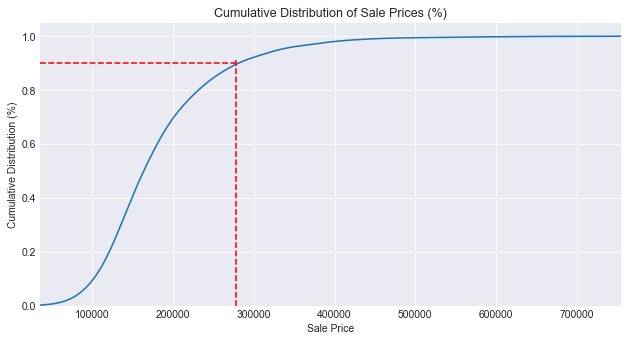

In [10]:
plt.style.use("seaborn-darkgrid")

fig, ax = plt.subplots(figsize = (10, 5), dpi = 75)

sns.kdeplot(df["SalePrice"], ax = ax, cumulative=True, legend = False)
ax.set(title = "Cumulative Distribution of Sale Prices (%)", xlabel = "Sale Price", ylabel = "Cumulative Distribution (%)");

ax.set_xlim([df["SalePrice"].min(), df["SalePrice"].max()]) 

xmax = (quantiles[-2] - quantiles[0]) / (quantiles[-1] - quantiles[0])
ax.axhline(y = 0.9, linestyle = "--", color = 'r', xmin = 0, xmax = xmax);

ax.axvline(x = quantiles[-2], linestyle = "--", color = 'r', ymin = 0, ymax = 0.87);

In [11]:
High_Price = df[df["SalePrice"] >= quantiles[-2]]["SalePrice"]

In [12]:
saleprice_discritized, new_quantiles = pd.qcut(High_Price, 10, labels = None, retbins = True, precision = 3, 
                                           duplicates = 'raise') 

new_quantiles = np.round(new_quantiles, 2)
intervals = []
for i in range(len(new_quantiles) - 1):
    intervals.append(f"[{new_quantiles[i]}, {new_quantiles[i + 1]})")

print_array(intervals, 1)

[278000.0, 285000.0)

[285000.0, 295794.4)

[295794.4, 311200.0)

[311200.0, 318024.4)

[318024.4, 326000.0)

[326000.0, 344057.2)

[344057.2, 374200.0)

[374200.0, 394923.4)

[394923.4, 442504.4)

[442504.4, 755000.0)



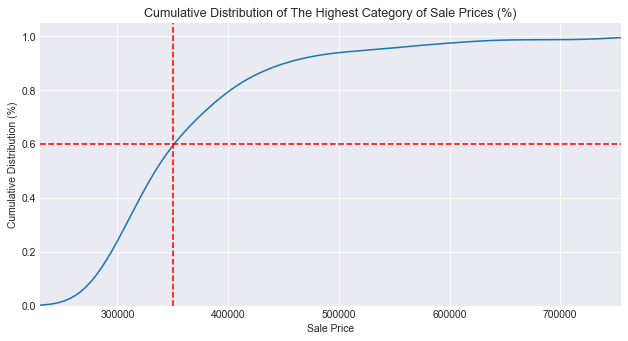

In [13]:
plt.style.use("seaborn-darkgrid")

fig, ax = plt.subplots(figsize = (10, 5), dpi = 75)

sns.kdeplot(High_Price, ax = ax, cumulative=True, legend = False)
ax.set(title = "Cumulative Distribution of The Highest Category of Sale Prices (%)", xlabel = "Sale Price",
       ylabel = "Cumulative Distribution (%)");

ax.set_xlim([230000, new_quantiles[-1]])

ax.axhline(y = 0.6, linestyle = "--", color = 'r', xmin = 0, xmax = 1);
ax.axvline(x = 350000, linestyle = "--", color = 'r', ymin = 0, ymax = 1);

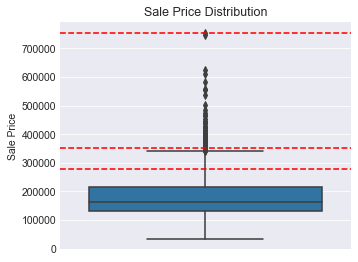

In [14]:
plt.style.use("seaborn-darkgrid")

fig, ax = plt.subplots(figsize = (5, 4), dpi = 75)

sns.boxplot(y = df["SalePrice"], ax = ax);
ax.set(title = "Sale Price Distribution", ylabel = "Sale Price");

ax.axhline(y = quantiles[-2], linestyle = "--", color = 'r');
ax.axhline(y = 350000, linestyle = "--", color = 'r');
ax.axhline(y = quantiles[-1], linestyle = "--", color = 'r');

**- The sale price of the houses in this dataset varies between (34900 - 755000)$.**

**- The mean value of the sale price is 180921$.**

**- Although the variation of sale price is very large, 90% of the houses are sold less than 278000$.**

**- Sale Prices can be descritized into the following categories:**

    [34900.0, 106475.0) 

    [106475.0, 124000.0)

    [124000.0, 135500.0)

    [135500.0, 147000.0)

    [147000.0, 163000.0)

    [163000.0, 179280.0)

    [179280.0, 198620.0)

    [198620.0, 230000.0)

    [230000.0, 278000.0)

    [278000.0, 350000.0)

    [350000.0, 755000.0)


In [15]:
new_intervals = [34900, 106475, 124000, 135500, 147000, 163000, 179280, 198620, 230000, 278000, 350000, 755000]

for i in range(len(new_intervals)):
    if i < len(new_intervals) - 1:
        df["SalePrice"] = df["SalePrice"].apply(lambda val: 
                                                i if (val >= new_intervals[i] and val < new_intervals[i + 1]) else val)
    else:
        df["SalePrice"] = df["SalePrice"].apply(lambda val: i if (val >= new_intervals[i]) else val )
    
pd.DataFrame(df["SalePrice"])

,SalePrice
0,7
1,6
2,7
3,3
4,8
...,...
1455,5
1456,7
1457,8
1458,3


#### 3.2. Feature Reduction
Preparing clear visual reports to examine what features have the least impact on the target value. Furthur investigations are also performed to understand whether some features can be ignored without having major effects on the target value. Although some data analysts ignore this step, it can be quite helpful to reduce the number of features in order to develop robust solutions and efficient applications.

###### 3.2.1 Categorical Features Investigation

Categorical features of the dataset are:

In [16]:
categoric_cols = FH(df).categoric_cols
print_array(categoric_cols, 6)

MSZoning            Street              LotShape            LandContour         Utilities           LotConfig           

LandSlope           Neighborhood        Condition1          Condition2          BldgType            HouseStyle          

RoofStyle           RoofMatl            Exterior1st         Exterior2nd         MasVnrType          ExterQual           

ExterCond           Foundation          BsmtQual            BsmtCond            BsmtExposure        BsmtFinType1        

BsmtFinType2        Heating             HeatingQC           CentralAir          Electrical          KitchenQual         

Functional          FireplaceQu         GarageType          GarageFinish        GarageQual          GarageCond          

PavedDrive          SaleType            SaleCondition       



In [17]:
def cat_target_scaler(df, cat_var, target_var, sorter = ["Frequency (%)"]):
    new_df = pd.DataFrame({"Min": df.groupby([cat_var]).min()[target_var],
                           "Mean": df.groupby([cat_var]).mean()[target_var],
                           "Max": df.groupby([cat_var]).max()[target_var],
                           "Average": 0,
                           "Frequency (%)": df[cat_var].value_counts()})
    mean_tot = []
    mydf = new_df[["Min", "Mean", "Max"]]
    for i in range(len(new_df)):
        mean_tot.append(np.mean(mydf.iloc[i]))
    new_df["Average"] = mean_tot
    new_df["Frequency (%)"] = new_df["Frequency (%)"] / len(df) * 100
    new_df = np.round(new_df, 2)
    new_df = new_df.sort_values(by = sorter, ascending=False)
    return new_df


from tabulate import tabulate
for col in categoric_cols:
    new_df = cat_target_scaler(df, col, "SalePrice")
    print(tabulate(new_df, headers = [col, "Min", "Mean", "Max", "Average","Frequency (%)"], tablefmt='pretty'))

+----------+-----+------+------+---------+---------------+
| MSZoning | Min | Mean | Max  | Average | Frequency (%) |
+----------+-----+------+------+---------+---------------+
|    RL    | 0.0 | 5.0  | 11.0 |  5.33   |     78.84     |
|    RM    | 0.0 | 1.93 | 10.0 |  3.98   |     14.93     |
|    FV    | 3.0 | 6.48 | 10.0 |  6.49   |     4.45      |
|    RH    | 0.0 | 2.44 | 7.0  |  3.15   |      1.1      |
| C (all)  | 0.0 | 0.3  | 2.0  |  0.77   |     0.68      |
+----------+-----+------+------+---------+---------------+
+--------+-----+------+------+---------+---------------+
| Street | Min | Mean | Max  | Average | Frequency (%) |
+--------+-----+------+------+---------+---------------+
|  Pave  | 0.0 | 4.56 | 11.0 |  5.19   |     99.59     |
|  Grvl  | 0.0 | 2.5  | 7.0  |  3.17   |     0.41      |
+--------+-----+------+------+---------+---------------+
+----------+-----+------+------+---------+---------------+
| LotShape | Min | Mean | Max  | Average | Frequency (%) |
+--------

+----------+-----+------+------+---------+---------------+
| RoofMatl | Min | Mean | Max  | Average | Frequency (%) |
+----------+-----+------+------+---------+---------------+
| CompShg  | 0.0 | 4.52 | 10.0 |  4.84   |     98.22     |
| Tar&Grv  | 0.0 | 5.0  | 8.0  |  4.33   |     0.75      |
| WdShngl  | 5.0 | 9.0  | 11.0 |  8.33   |     0.41      |
| WdShake  | 6.0 | 7.6  | 9.0  |  7.53   |     0.34      |
| ClyTile  | 4.0 | 4.0  | 4.0  |   4.0   |     0.07      |
| Membran  | 8.0 | 8.0  | 8.0  |   8.0   |     0.07      |
|  Metal   | 6.0 | 6.0  | 6.0  |   6.0   |     0.07      |
|   Roll   | 3.0 | 3.0  | 3.0  |   3.0   |     0.07      |
+----------+-----+------+------+---------+---------------+
+-------------+-----+------+------+---------+---------------+
| Exterior1st | Min | Mean | Max  | Average | Frequency (%) |
+-------------+-----+------+------+---------+---------------+
|   VinylSd   | 0.0 | 6.04 | 10.0 |  5.35   |     35.27     |
|   HdBoard   | 0.0 | 3.87 | 11.0 |  4.96   

+---------+-----+------+------+---------+---------------+
| Heating | Min | Mean | Max  | Average | Frequency (%) |
+---------+-----+------+------+---------+---------------+
|  GasA   | 0.0 | 4.6  | 11.0 |   5.2   |     97.81     |
|  GasW   | 0.0 | 3.78 | 10.0 |  4.59   |     1.23      |
|  Grav   | 0.0 | 0.14 | 1.0  |  0.38   |     0.48      |
|  Wall   | 0.0 | 0.0  | 0.0  |   0.0   |     0.27      |
|  OthW   | 1.0 | 1.5  | 2.0  |   1.5   |     0.14      |
|  Floor  | 0.0 | 0.0  | 0.0  |   0.0   |     0.07      |
+---------+-----+------+------+---------+---------------+
+-----------+-----+------+------+---------+---------------+
| HeatingQC | Min | Mean | Max  | Average | Frequency (%) |
+-----------+-----+------+------+---------+---------------+
|    Ex     | 0.0 | 5.94 | 11.0 |  5.65   |     50.75     |
|    TA     | 0.0 | 2.88 | 10.0 |  4.29   |     29.32     |
|    Gd     | 0.0 | 3.73 | 10.0 |  4.58   |     16.51     |
|    Fa     | 0.0 | 2.27 | 8.0  |  3.42   |     3.36      |


**As observed, the frequency of one category in some of the categorical features is very high (> 97 %), therefore, these features can be removed from the dataset.**

In [18]:
removable_cols = ["Street", "Utilities", "LandSlope", "Condition2", "RoofMatl", "Heating"]
for col in removable_cols:
    df.drop(col, axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,7
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,6
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,3
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,8


**Moreover, it is found that some categorical columns are inherentely ordered variables, so they can be turned into integer lists to speed up the process of analysis; this section is dedicated to deal with this type of categorical variables.**

In [19]:
ordered_cat = ['LotShape', 'ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCond', 
               'GarageFinish', 'GarageQual', 'PavedDrive', 'CentralAir']

dictLotShape = dict({'Reg':4,'IR1':3, 'IR2':2, 'IR3':1})
dictExterCond = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictExterQual = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictBsmtQual = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictBsmtCond = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictBsmtExposure = dict({'Gd':4,'Av':3, 'Mn':2, 'No':1, 'Missing':0})
dictBsmtFinType1 = dict({'GLQ':6, 'ALQ':5,'BLQ':4, 'Rec':3,'LwQ':2 ,'Unf':1,'Missing':0})
dictBsmtFinType2 = dict({'GLQ':6, 'ALQ':5,'BLQ':4, 'Rec':3,'LwQ':2 ,'Unf':1,'Missing':0})
dictHeatingQC = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictKitchenQual = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictFunctional = dict({'Typ':7, 'Min1':6,'Min2':5, 'Mod':4,'Maj1':3, 'Maj2':2, 'Sev':1})
dictFireplaceQu = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictGarageCond = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictGarageFinish = dict({'Fin':3, 'RFn':2, 'Unf':1, 'Missing':0})
dictGarageQual = dict({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Missing':0})
dictPavedDrive = dict({'Y':3,'P':2,'N':1})
dictCentralAir = dict({'Y':1, 'N':0})

dicts = [dictLotShape, dictExterCond, dictExterQual, dictBsmtQual, dictBsmtCond, dictBsmtExposure,
         dictBsmtFinType1, dictBsmtFinType2, dictHeatingQC, dictKitchenQual, dictFunctional, dictFireplaceQu, dictGarageCond,
         dictGarageFinish, dictGarageQual, dictPavedDrive, dictCentralAir]

for i, j in zip(dicts, ordered_cat):
    df[j] = df[j].map(i)
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,4,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,5,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,0,2,2008,WD,Normal,7
1,20,RL,80.0,9600,4,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2,460,3,3,3,298,0,0,0,0,0,0,5,2007,WD,Normal,6
2,60,RL,68.0,11250,3,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2,608,3,3,3,0,42,0,0,0,0,0,9,2008,WD,Normal,7
3,70,RL,60.0,9550,3,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,4,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3,642,3,3,3,0,35,272,0,0,0,0,2,2006,WD,Abnorml,3
4,60,RL,84.0,14260,3,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,5,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2000.0,2,3,836,3,3,3,192,84,0,0,0,0,0,12,2008,WD,Normal,8


**Hence the non-ordered categorical features of the dataset are:**

In [20]:
categoric_cols = FH(df).categoric_cols
print_array(categoric_cols, 6)

MSZoning            LandContour         LotConfig           Neighborhood        Condition1          BldgType            

HouseStyle          RoofStyle           Exterior1st         Exterior2nd         MasVnrType          Foundation          

Electrical          GarageType          SaleType            SaleCondition       



In [21]:
for col in categoric_cols:
    new_df = cat_target_scaler(df, col, "SalePrice")
    print(tabulate(new_df, headers = [col, "Min", "Mean", "Max", "Average", "Frequency (%)"], tablefmt='pretty'))

+----------+-----+------+------+---------+---------------+
| MSZoning | Min | Mean | Max  | Average | Frequency (%) |
+----------+-----+------+------+---------+---------------+
|    RL    | 0.0 | 5.0  | 11.0 |  5.33   |     78.84     |
|    RM    | 0.0 | 1.93 | 10.0 |  3.98   |     14.93     |
|    FV    | 3.0 | 6.48 | 10.0 |  6.49   |     4.45      |
|    RH    | 0.0 | 2.44 | 7.0  |  3.15   |      1.1      |
| C (all)  | 0.0 | 0.3  | 2.0  |  0.77   |     0.68      |
+----------+-----+------+------+---------+---------------+
+-------------+-----+------+------+---------+---------------+
| LandContour | Min | Mean | Max  | Average | Frequency (%) |
+-------------+-----+------+------+---------+---------------+
|     Lvl     | 0.0 | 4.53 | 11.0 |  5.18   |     89.79     |
|     Bnk     | 0.0 | 3.06 | 9.0  |  4.02   |     4.32      |
|     HLS     | 0.0 | 6.2  | 10.0 |   5.4   |     3.42      |
|     Low     | 0.0 | 5.58 | 10.0 |  5.19   |     2.47      |
+-------------+-----+------+------+

+------------+-----+------+------+---------+---------------+
| MasVnrType | Min | Mean | Max  | Average | Frequency (%) |
+------------+-----+------+------+---------+---------------+
|    None    | 0.0 | 3.58 | 10.0 |  4.53   |     59.18     |
|  BrkFace   | 0.0 | 5.6  | 11.0 |  5.53   |     30.48     |
|   Stone    | 1.0 | 7.42 | 10.0 |  6.14   |     8.77      |
|   BrkCmn   | 0.0 | 3.13 | 8.0  |  3.71   |     1.03      |
|  Missing   | 6.0 | 7.25 | 10.0 |  7.75   |     0.55      |
+------------+-----+------+------+---------+---------------+
+------------+-----+------+------+---------+---------------+
| Foundation | Min | Mean | Max  | Average | Frequency (%) |
+------------+-----+------+------+---------+---------------+
|   PConc    | 0.0 | 6.4  | 11.0 |   5.8   |     44.32     |
|   CBlock   | 0.0 | 3.31 | 10.0 |  4.44   |     43.42     |
|   BrkTil   | 0.0 | 2.34 | 10.0 |  4.11   |     10.0      |
|    Slab    | 0.0 | 1.12 | 6.0  |  2.38   |     1.64      |
|   Stone    | 0.0 | 3.5

**From the tables, it is extracted that the following categories for each feature can be considered as one category:**

In [22]:
# MSZoning_samecat = ["FV", "RL"] 
# 				   ["RH", "RM"]
# LandContour_samecat = ["Bnk", "HLS", "Low"]
# LotConfig_samecat = ["CulDSac", "FR2", "FR3"]
# Neighborhood_samecat = ["Blmngtn", "ClearCr", "Crawfor", "SawyerW"] 
# 					   ["Blueste", "BrkSide", "Mitchel", "NPKVill", "SWISU"]
# 					   ["BrDale", "IDOTRR", "MeadowV"]
# 					   ["NoRidge", "Timber"]
# Condition1_samecat = ["Artery", "RRAn", "RRNn"]
# 					 ["PosA", "PosN", "RRNe"]
# 					 ["RRAe", "Feedr"]
# BldgType_samecat = ["2fmCon", "Duplex", "Twnhs"]
# HouseStyle_samecat = ["2.5Unf", "2.5Fin", "1Story"]
# RoofStyle_samecat = ["Flat", "Mansard"]
# 					["Shed", "Gable"]
# Exterior1st_samecat = ["AsphShn", "BrkComm", "CBlock"]
# 					  ["ImStucc", "Stone"]
# Exterior2nd_samecat = ["AsphShn", "Brk Cmn", "AsbShng", "CBlock"]
# 					  ["ImStucc", "Stone", "Stucco", "Wd Shng", "Other"]
# Foundation_samecat = ["Stone", "BrkTil"]
# 					 ["Wood", "PConc"]
# Electrical_samecat = ["Mix", "FuseP", "FuseF"]
# 					 ["Missing", "SBrkr"]
# GarageType_samecat = ["2Types", "CarPort", "Missing"]
# SaleType_samecat = ["CWD", "New", "Con"]
# 				   ["ConLD", "ConLw"]
# 				   ["ConLI", "WD"]
# SaleCondition_samecat = ["Alloca", "Family"]

In [23]:
MSZoning_group1 = ["FV", "RL"]
MSZoning_group2 = ["RH", "RM"]
MSZoning_groups = [MSZoning_group1, MSZoning_group2]


LandContour_group1 = ["Bnk", "HLS", "Low"]
LandContour_groups = [LandContour_group1]

LotConfig_group1 = ["CulDSac", "FR2", "FR3"]
LotConfig_groups = [LotConfig_group1]

Neighborhood_group1 = ["Blmngtn", "ClearCr", "Crawfor", "SawyerW"] 
Neighborhood_group2 = ["Blueste", "BrkSide", "Mitchel", "NPKVill", "SWISU"]
Neighborhood_group3 = ["BrDale", "IDOTRR", "MeadowV"]
Neighborhood_group4 = ["NoRidge", "Timber", "Veenker"]
Neighborhood_groups = [Neighborhood_group1, Neighborhood_group2, Neighborhood_group3, Neighborhood_group4]

Condition1_group1 = ["Artery", "RRAn", "RRNn"]
Condition1_group2 = ["PosA", "PosN", "RRNe"]
Condition1_group3 = ["RRAe", "Feedr"]
Condition1_groups = [Condition1_group1, Condition1_group2, Condition1_group3]

BldgType_group1 = ["2fmCon", "Duplex", "Twnhs"]
BldgType_groups = [BldgType_group1]

HouseStyle_group1 = ["2.5Unf", "2.5Fin", "1Story"]
HouseStyle_groups = [HouseStyle_group1]

RoofStyle_group1 = ["Flat", "Mansard"]
RoofStyle_group2 = ["Shed", "Gable"]
RoofStyle_groups = [RoofStyle_group1, RoofStyle_group2]

Exterior1st_group1 = ["AsphShn", "BrkComm", "CBlock"]
Exterior1st_group2 = ["ImStucc", "Stone"]
Exterior1st_groups = [Exterior1st_group1, Exterior1st_group2]

Exterior2nd_group1 = ["AsphShn", "Brk Cmn", "AsbShng", "CBlock"]
Exterior2nd_group2 = ["ImStucc", "Stone", "Stucco", "Wd Shng", "Other"]
Exterior2nd_groups = [Exterior2nd_group1, Exterior2nd_group2]

Foundation_group1 = ["Stone", "BrkTil"]
Foundation_group2 = ["Wood", "PConc"]
Foundation_groups = [Foundation_group1, Foundation_group2]

Electrical_group1 = ["Mix", "FuseP", "FuseF"]
Electrical_group2 = ["Missing", "SBrkr"]
Electrical_groups = [Electrical_group1, Electrical_group2]

GarageType_group1 = ["2Types", "CarPort", "Missing"]
GarageType_groups = [GarageType_group1]

SaleType_group1 = ["CWD", "New", "Con"]
SaleType_group2 = ["ConLD", "ConLw"]
SaleType_group3 = ["ConLI", "WD"]
SaleType_groups = [SaleType_group1, SaleType_group2, SaleType_group3]

SaleCondition_group1 = ["Alloca", "Family"]
SaleCondition_groups = [SaleCondition_group1]

#--------------------------------------------------------------------------------
to_be_changed_cols = ["MSZoning", "LandContour", "LotConfig", "Neighborhood", "Condition1", "BldgType", "HouseStyle", 
                      "RoofStyle", "Exterior1st", "Exterior2nd", "Foundation", "Electrical", "GarageType", "SaleType", 
                      "SaleCondition"]
groups = [MSZoning_groups, LandContour_groups, LotConfig_groups, Neighborhood_groups, Condition1_groups, BldgType_groups, 
          HouseStyle_groups, RoofStyle_groups, Exterior1st_groups, Exterior2nd_groups, Foundation_groups, Electrical_groups, 
          GarageType_groups, SaleType_groups, SaleCondition_groups]
#--------------------------------------------------------------------------------
def same_cat(val, groups, col):
    for i in range(len(groups)):
        if val in groups[i]:
            val = f"{col}_group{i + 1}"
            break
    return val

group_numerator = 0
for col in to_be_changed_cols:
    df[col] = df[col].apply(lambda val: same_cat(val, groups[group_numerator], col))
    group_numerator += 1

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,MSZoning_group1,65.0,8450,4,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,RoofStyle_group2,VinylSd,VinylSd,BrkFace,196.0,4,3,Foundation_group2,4,3,1,6,706,1,0,150,856,5,1,Electrical_group2,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,0,2,2008,SaleType_group3,Normal,7
1,20,MSZoning_group1,80.0,9600,4,Lvl,LotConfig_group1,Neighborhood_group4,Condition1_group3,1Fam,HouseStyle_group1,6,8,1976,1976,RoofStyle_group2,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,1,Electrical_group2,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2,460,3,3,3,298,0,0,0,0,0,0,5,2007,SaleType_group3,Normal,6
2,60,MSZoning_group1,68.0,11250,3,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,RoofStyle_group2,VinylSd,VinylSd,BrkFace,162.0,4,3,Foundation_group2,4,3,2,6,486,1,0,434,920,5,1,Electrical_group2,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2,608,3,3,3,0,42,0,0,0,0,0,9,2008,SaleType_group3,Normal,7
3,70,MSZoning_group1,60.0,9550,3,Lvl,Corner,Neighborhood_group1,Norm,1Fam,2Story,7,5,1915,1970,RoofStyle_group2,Wd Sdng,Exterior2nd_group2,None,0.0,3,3,Foundation_group1,3,4,1,5,216,1,0,540,756,4,1,Electrical_group2,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3,642,3,3,3,0,35,272,0,0,0,0,2,2006,SaleType_group3,Abnorml,3
4,60,MSZoning_group1,84.0,14260,3,Lvl,LotConfig_group1,Neighborhood_group4,Norm,1Fam,2Story,8,5,2000,2000,RoofStyle_group2,VinylSd,VinylSd,BrkFace,350.0,4,3,Foundation_group2,4,3,3,6,655,1,0,490,1145,5,1,Electrical_group2,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2000.0,2,3,836,3,3,3,192,84,0,0,0,0,0,12,2008,SaleType_group3,Normal,8


In [24]:
for col in categoric_cols:
    new_df = cat_target_scaler(df, col, "SalePrice")
    print(tabulate(new_df, headers = [col, "Min", "Mean", "Max", "Average", "Frequency (%)"], tablefmt='pretty'))

+-----------------+-----+------+------+---------+---------------+
|    MSZoning     | Min | Mean | Max  | Average | Frequency (%) |
+-----------------+-----+------+------+---------+---------------+
| MSZoning_group1 | 0.0 | 5.08 | 11.0 |  5.36   |     83.29     |
| MSZoning_group2 | 0.0 | 1.89 | 10.0 |  3.96   |     16.71     |
+-----------------+-----+------+------+---------+---------------+
+--------------------+-----+------+------+---------+---------------+
|    LandContour     | Min | Mean | Max  | Average | Frequency (%) |
+--------------------+-----+------+------+---------+---------------+
|        Lvl         | 0.0 | 4.53 | 11.0 |  5.18   |     89.79     |
| LandContour_group1 | 0.0 | 4.72 | 10.0 |  4.91   |     10.21     |
+--------------------+-----+------+------+---------+---------------+
+------------------+-----+------+------+---------+---------------+
|    LotConfig     | Min | Mean | Max  | Average | Frequency (%) |
+------------------+-----+------+------+---------+------

+-------------------+-----+------+------+---------+---------------+
|    GarageType     | Min | Mean | Max  | Average | Frequency (%) |
+-------------------+-----+------+------+---------+---------------+
|      Attchd       | 0.0 | 5.63 | 11.0 |  5.54   |     59.59     |
|      Detchd       | 0.0 | 2.42 | 10.0 |  4.14   |     26.51     |
| GarageType_group1 | 0.0 | 1.2  | 7.0  |  2.73   |     6.58      |
|      BuiltIn      | 0.0 | 7.07 | 10.0 |  5.69   |     6.03      |
|      Basment      | 0.0 | 3.95 | 10.0 |  4.65   |      1.3      |
+-------------------+-----+------+------+---------+---------------+
+-----------------+-----+------+------+---------+---------------+
|    SaleType     | Min | Mean | Max  | Average | Frequency (%) |
+-----------------+-----+------+------+---------+---------------+
| SaleType_group3 | 0.0 | 4.32 | 11.0 |  5.11   |     87.12     |
| SaleType_group1 | 1.0 | 7.59 | 10.0 |   6.2   |     8.77      |
|       COD       | 0.0 | 3.12 | 9.0  |  4.04   |     2.95

In [25]:
to_be_checked_cols = ["LandContour", "LotConfig", "Condition1", "BldgType", "RoofStyle", "Exterior2nd", "GarageType", 
                      "SaleType", "SaleCondition"]
len(to_be_checked_cols)

9

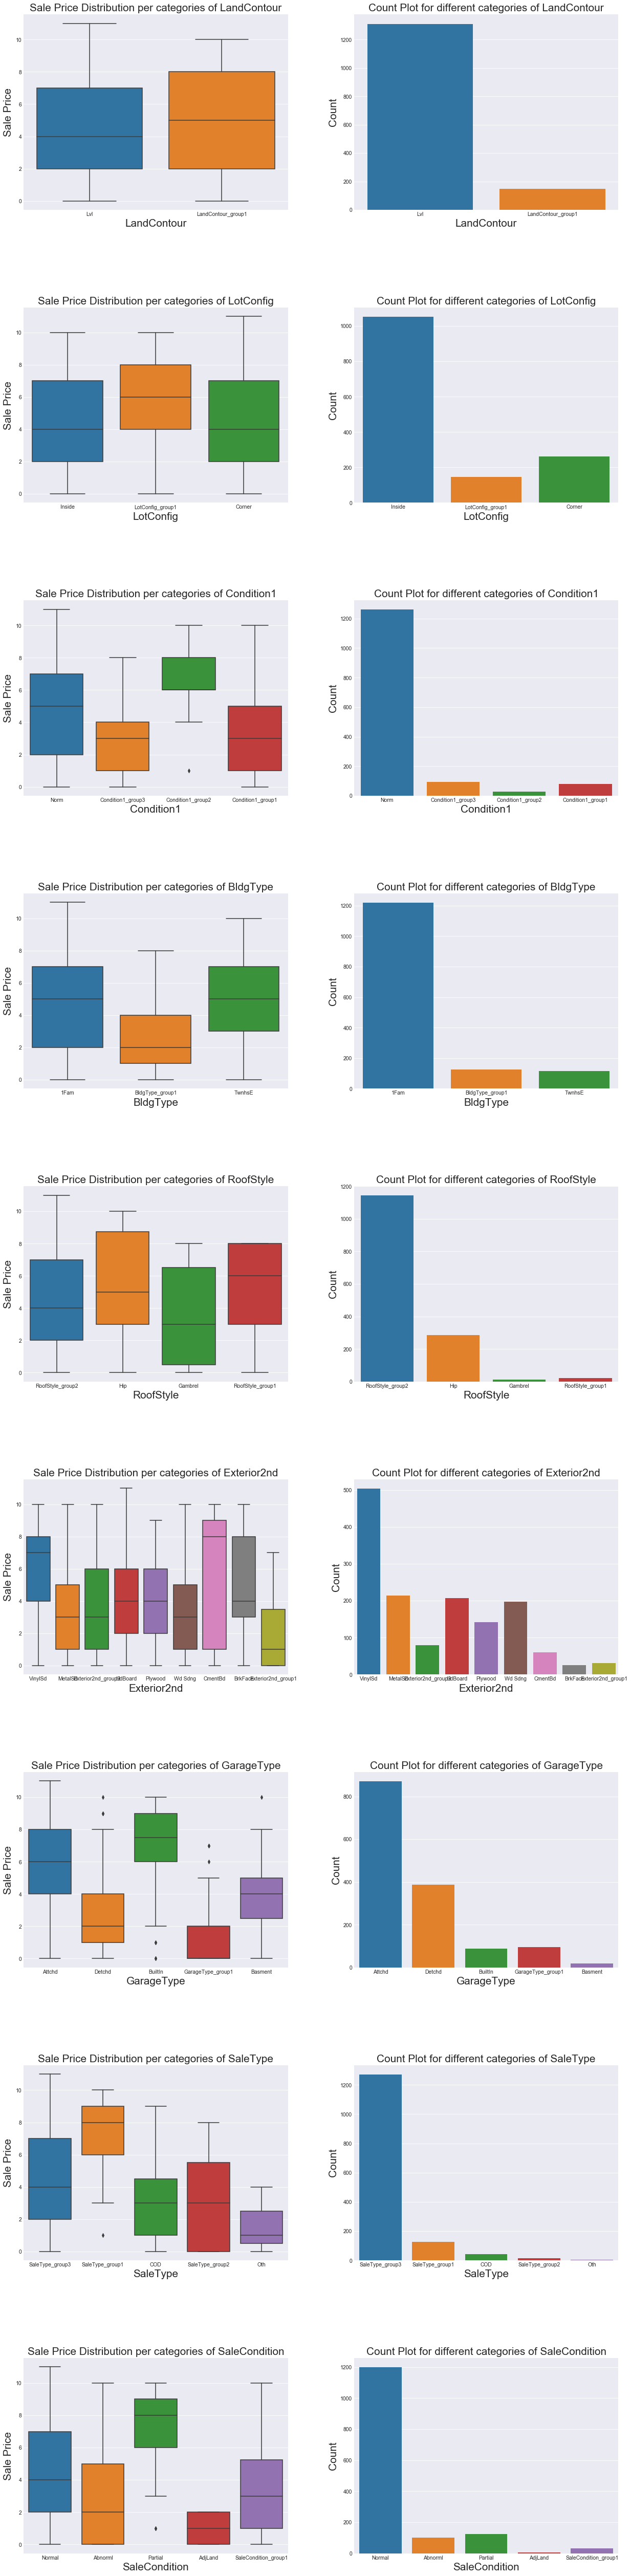

In [26]:
plt.style.use("seaborn-darkgrid")

fig, axes = plt.subplots(nrows = len(to_be_checked_cols), ncols = 2, figsize = (20, 7.5 * len(to_be_checked_cols)), dpi = 75)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.25)

for i in range(len(to_be_checked_cols)):
    sns.boxplot(x = df[to_be_checked_cols[i]], y = df["SalePrice"], ax = axes[i][0]);
    axes[i][0].set_title(f"Sale Price Distribution per categories of {to_be_checked_cols[i]}", fontsize = 20);
    axes[i][0].set_ylabel("Sale Price", fontsize = 20)
    axes[i][0].set_xlabel(to_be_checked_cols[i], fontsize = 20)
    
    sns.countplot(data = df, x = to_be_checked_cols[i], ax = axes[i][1]);
    axes[i][1].set_title(f"Count Plot for different categories of {to_be_checked_cols[i]}", fontsize = 20);
    axes[i][1].set_ylabel("Count", fontsize = 20)
    axes[i][1].set_xlabel(to_be_checked_cols[i], fontsize = 20)

**From the above investigation, it is extracted that `LandContour`, `LotConfig`, `BldgType`, and `RoofStyle` are less effective on the sale prices, so they can be removed.**

In [27]:
to_be_removed_cols = ["LandContour", "LotConfig", "BldgType", "RoofStyle"]
for col in to_be_removed_cols:
    df.drop(col, axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,MSZoning_group1,65.0,8450,4,CollgCr,Norm,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,4,3,Foundation_group2,4,3,1,6,706,1,0,150,856,5,1,Electrical_group2,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,0,2,2008,SaleType_group3,Normal,7
1,20,MSZoning_group1,80.0,9600,4,Neighborhood_group4,Condition1_group3,HouseStyle_group1,6,8,1976,1976,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,1,Electrical_group2,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2,460,3,3,3,298,0,0,0,0,0,0,5,2007,SaleType_group3,Normal,6
2,60,MSZoning_group1,68.0,11250,3,CollgCr,Norm,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,4,3,Foundation_group2,4,3,2,6,486,1,0,434,920,5,1,Electrical_group2,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2,608,3,3,3,0,42,0,0,0,0,0,9,2008,SaleType_group3,Normal,7
3,70,MSZoning_group1,60.0,9550,3,Neighborhood_group1,Norm,2Story,7,5,1915,1970,Wd Sdng,Exterior2nd_group2,None,0.0,3,3,Foundation_group1,3,4,1,5,216,1,0,540,756,4,1,Electrical_group2,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3,642,3,3,3,0,35,272,0,0,0,0,2,2006,SaleType_group3,Abnorml,3
4,60,MSZoning_group1,84.0,14260,3,Neighborhood_group4,Norm,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,4,3,Foundation_group2,4,3,3,6,655,1,0,490,1145,5,1,Electrical_group2,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2000.0,2,3,836,3,3,3,192,84,0,0,0,0,0,12,2008,SaleType_group3,Normal,8


###### 3.2.2 Numerical Feature Investigation

**Numerical featurs of the dataset are:**

In [28]:
numeric_cols = FH(df).numeric_cols
print_array(numeric_cols, 6)

MSSubClass          LotFrontage         LotArea             LotShape            OverallQual         OverallCond         

YearBuilt           YearRemodAdd        MasVnrArea          ExterQual           ExterCond           BsmtQual            

BsmtCond            BsmtExposure        BsmtFinType1        BsmtFinSF1          BsmtFinType2        BsmtFinSF2          

BsmtUnfSF           TotalBsmtSF         HeatingQC           CentralAir          1stFlrSF            2ndFlrSF            

LowQualFinSF        GrLivArea           BsmtFullBath        BsmtHalfBath        FullBath            HalfBath            

BedroomAbvGr        KitchenAbvGr        KitchenQual         TotRmsAbvGrd        Functional          Fireplaces          

FireplaceQu         GarageYrBlt         GarageFinish        GarageCars          GarageArea          GarageQual          

GarageCond          PavedDrive          WoodDeckSF          OpenPorchSF         EnclosedPorch       3SsnPorch           

ScreenPorch         Pool

In [29]:
new_df = pd.DataFrame(df.corr()["SalePrice"])
new_df

,SalePrice
MSSubClass,-0.073978
LotFrontage,0.161514
LotArea,0.248940
LotShape,-0.310234
OverallQual,0.801931
OverallCond,-0.084393
YearBuilt,0.614911
YearRemodAdd,0.583593
MasVnrArea,0.393595
ExterQual,0.676889


In [30]:
df1 = new_df[new_df["SalePrice"] <= 0.1]
df2 = df1[df1["SalePrice"] >= -0.1]
df2 = df2.apply(lambda val: np.abs(val))
df2 = df2.sort_values(by=['SalePrice'])
df2

,SalePrice
BsmtFinSF2,0.006066
BsmtFinType2,0.011086
MiscVal,0.011314
ExterCond,0.015201
BsmtHalfBath,0.017764
YrSold,0.029311
LowQualFinSF,0.049427
PoolArea,0.058365
3SsnPorch,0.062756
MoSold,0.063912


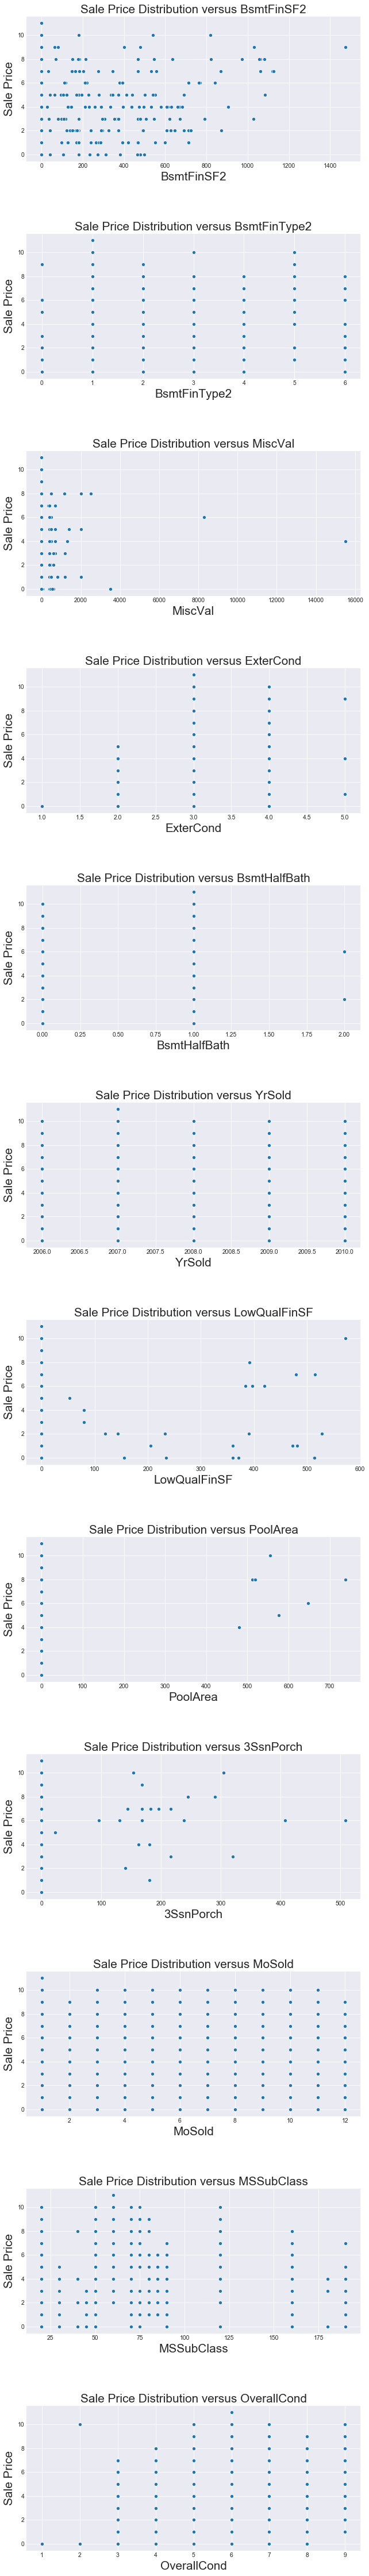

In [31]:
plt.style.use("seaborn-darkgrid")

fig, axes = plt.subplots(nrows = len(df2), ncols = 1, figsize = (10, 5 * len(df2)), dpi = 75)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.25)

for i in range(len(df2)):
    sns.scatterplot(x = df[df2.index[i]], y = df["SalePrice"], ax = axes[i]);
    axes[i].set_title(f"Sale Price Distribution versus {df2.index[i]}", fontsize = 20);
    axes[i].set_ylabel("Sale Price", fontsize = 20)
    axes[i].set_xlabel(df2.index[i], fontsize = 20)

In [32]:
set(df2.index)- set(["LowQualFinSF", "OverallCond"])

{'3SsnPorch',
 'BsmtFinSF2',
 'BsmtFinType2',
 'BsmtHalfBath',
 'ExterCond',
 'MSSubClass',
 'MiscVal',
 'MoSold',
 'PoolArea',
 'YrSold'}

**From the above investigation, it is extracted that `3SsnPorch`, `BsmtFinSF2`, `BsmtFinType2`, `BsmtHalfBath`, `ExterCond`, `MSSubClass`, `MiscVal`, `MoSold`, `PoolArea`, and `YrSold` have low effects on the sale prices, so they can be removed.**

In [33]:
to_be_removed_cols = set(df2.index)- set(["LowQualFinSF", "OverallCond"])
for col in to_be_removed_cols:
    df.drop(col, axis = 1, inplace = True)
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,MSZoning_group1,65.0,8450,4,CollgCr,Norm,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,4,Foundation_group2,4,3,1,6,706,150,856,5,1,Electrical_group2,856,854,0,1710,1,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2,548,3,3,3,0,61,0,0,SaleType_group3,Normal,7
1,MSZoning_group1,80.0,9600,4,Neighborhood_group4,Condition1_group3,HouseStyle_group1,6,8,1976,1976,MetalSd,MetalSd,None,0.0,3,CBlock,4,3,4,5,978,284,1262,5,1,Electrical_group2,1262,0,0,1262,0,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2,460,3,3,3,298,0,0,0,SaleType_group3,Normal,6
2,MSZoning_group1,68.0,11250,3,CollgCr,Norm,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,4,Foundation_group2,4,3,2,6,486,434,920,5,1,Electrical_group2,920,866,0,1786,1,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2,608,3,3,3,0,42,0,0,SaleType_group3,Normal,7
3,MSZoning_group1,60.0,9550,3,Neighborhood_group1,Norm,2Story,7,5,1915,1970,Wd Sdng,Exterior2nd_group2,None,0.0,3,Foundation_group1,3,4,1,5,216,540,756,4,1,Electrical_group2,961,756,0,1717,1,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3,642,3,3,3,0,35,272,0,SaleType_group3,Abnorml,3
4,MSZoning_group1,84.0,14260,3,Neighborhood_group4,Norm,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,4,Foundation_group2,4,3,3,6,655,490,1145,5,1,Electrical_group2,1145,1053,0,2198,1,2,1,4,1,4,9,7,1,3,Attchd,2000.0,2,3,836,3,3,3,192,84,0,0,SaleType_group3,Normal,8


In [34]:
numeric_cols = FH(df).numeric_cols
print_array(numeric_cols, 6)

LotFrontage         LotArea             LotShape            OverallQual         OverallCond         YearBuilt           

YearRemodAdd        MasVnrArea          ExterQual           BsmtQual            BsmtCond            BsmtExposure        

BsmtFinType1        BsmtFinSF1          BsmtUnfSF           TotalBsmtSF         HeatingQC           CentralAir          

1stFlrSF            2ndFlrSF            LowQualFinSF        GrLivArea           BsmtFullBath        FullBath            

HalfBath            BedroomAbvGr        KitchenAbvGr        KitchenQual         TotRmsAbvGrd        Functional          

Fireplaces          FireplaceQu         GarageYrBlt         GarageFinish        GarageCars          GarageArea          

GarageQual          GarageCond          PavedDrive          WoodDeckSF          OpenPorchSF         EnclosedPorch       

ScreenPorch         SalePrice           



In [35]:
for col in numeric_cols:
    new_df = pd.DataFrame(df.corr()[col])
    new_df = new_df.apply(lambda val: np.abs(val))
    new_df = new_df[new_df[col] >= 0.8]
    new_df = np.round(new_df, 2)
    print(tabulate(new_df, headers = [col, "Corr Val"], tablefmt='pretty'))

+-------------+----------+
| LotFrontage | Corr Val |
+-------------+----------+
| LotFrontage |   1.0    |
+-------------+----------+
+---------+----------+
| LotArea | Corr Val |
+---------+----------+
| LotArea |   1.0    |
+---------+----------+
+----------+----------+
| LotShape | Corr Val |
+----------+----------+
| LotShape |   1.0    |
+----------+----------+
+-------------+----------+
| OverallQual | Corr Val |
+-------------+----------+
| OverallQual |   1.0    |
|  SalePrice  |   0.8    |
+-------------+----------+
+-------------+----------+
| OverallCond | Corr Val |
+-------------+----------+
| OverallCond |   1.0    |
+-------------+----------+
+-----------+----------+
| YearBuilt | Corr Val |
+-----------+----------+
| YearBuilt |   1.0    |
+-----------+----------+
+--------------+----------+
| YearRemodAdd | Corr Val |
+--------------+----------+
| YearRemodAdd |   1.0    |
+--------------+----------+
+------------+----------+
| MasVnrArea | Corr Val |
+------------+--

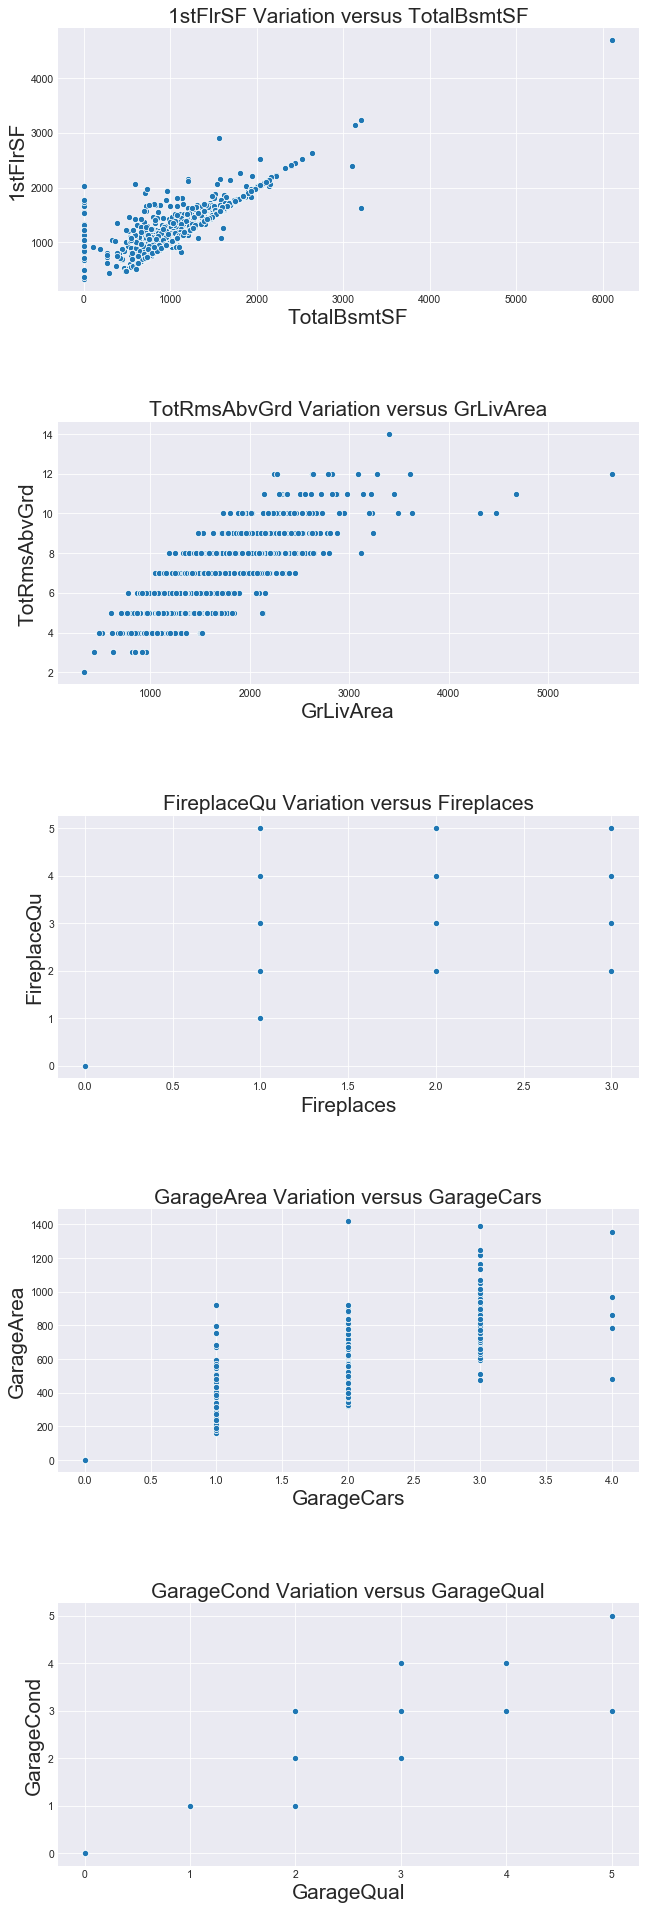

In [36]:
high_corrs = [["TotalBsmtSF", "1stFlrSF"], ["GrLivArea", "TotRmsAbvGrd"], ["Fireplaces", "FireplaceQu"], 
              ["GarageCars", "GarageArea"], ["GarageQual", "GarageCond"]]

plt.style.use("seaborn-darkgrid")

fig, axes = plt.subplots(nrows = len(high_corrs), ncols = 1, figsize = (10, 5 * len(high_corrs)), dpi = 75)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.25)

for i in range(len(high_corrs)):
    sns.scatterplot(x = df[high_corrs[i][0]], y = df[high_corrs[i][1]], ax = axes[i]);
    axes[i].set_title(f"{high_corrs[i][1]} Variation versus {high_corrs[i][0]}", fontsize = 20);
    axes[i].set_ylabel(f"{high_corrs[i][1]}", fontsize = 20)
    axes[i].set_xlabel(f"{high_corrs[i][0]}", fontsize = 20)

**[`TotalBsmtSF`, `1stFlrSF`], [`GarageQual`, `GarageCond`] are alomst linearly related, so therefore, `1stFlrSF` and `GarageCond` can be removed.**

In [37]:
to_be_removed_cols = ["1stFlrSF", "GarageCond"]
for col in to_be_removed_cols:
    df.drop(col, axis = 1, inplace = True)
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,MSZoning_group1,65.0,8450,4,CollgCr,Norm,2Story,7,5,2003,2003,VinylSd,VinylSd,BrkFace,196.0,4,Foundation_group2,4,3,1,6,706,150,856,5,1,Electrical_group2,854,0,1710,1,2,1,3,1,4,8,7,0,0,Attchd,2003.0,2,2,548,3,3,0,61,0,0,SaleType_group3,Normal,7
1,MSZoning_group1,80.0,9600,4,Neighborhood_group4,Condition1_group3,HouseStyle_group1,6,8,1976,1976,MetalSd,MetalSd,None,0.0,3,CBlock,4,3,4,5,978,284,1262,5,1,Electrical_group2,0,0,1262,0,2,0,3,1,3,6,7,1,3,Attchd,1976.0,2,2,460,3,3,298,0,0,0,SaleType_group3,Normal,6
2,MSZoning_group1,68.0,11250,3,CollgCr,Norm,2Story,7,5,2001,2002,VinylSd,VinylSd,BrkFace,162.0,4,Foundation_group2,4,3,2,6,486,434,920,5,1,Electrical_group2,866,0,1786,1,2,1,3,1,4,6,7,1,3,Attchd,2001.0,2,2,608,3,3,0,42,0,0,SaleType_group3,Normal,7
3,MSZoning_group1,60.0,9550,3,Neighborhood_group1,Norm,2Story,7,5,1915,1970,Wd Sdng,Exterior2nd_group2,None,0.0,3,Foundation_group1,3,4,1,5,216,540,756,4,1,Electrical_group2,756,0,1717,1,1,0,3,1,4,7,7,1,4,Detchd,1998.0,1,3,642,3,3,0,35,272,0,SaleType_group3,Abnorml,3
4,MSZoning_group1,84.0,14260,3,Neighborhood_group4,Norm,2Story,8,5,2000,2000,VinylSd,VinylSd,BrkFace,350.0,4,Foundation_group2,4,3,3,6,655,490,1145,5,1,Electrical_group2,1053,0,2198,1,2,1,4,1,4,9,7,1,3,Attchd,2000.0,2,3,836,3,3,192,84,0,0,SaleType_group3,Normal,8


#### 3.3. Categorical Feature Encoding

In [38]:
categoric_cols = FH(df).categoric_cols
print_array(categoric_cols, 6)

MSZoning            Neighborhood        Condition1          HouseStyle          Exterior1st         Exterior2nd         

MasVnrType          Foundation          Electrical          GarageType          SaleType            SaleCondition       



In [39]:
for col in categoric_cols:
    new_df = cat_target_scaler(df, col, "SalePrice")
    print(tabulate(new_df, headers = [col, "Min", "Mean", "Max", "Average", "Frequency (%)"], tablefmt='pretty'))

+-----------------+-----+------+------+---------+---------------+
|    MSZoning     | Min | Mean | Max  | Average | Frequency (%) |
+-----------------+-----+------+------+---------+---------------+
| MSZoning_group1 | 0.0 | 5.08 | 11.0 |  5.36   |     83.29     |
| MSZoning_group2 | 0.0 | 1.89 | 10.0 |  3.96   |     16.71     |
+-----------------+-----+------+------+---------+---------------+
+---------------------+-----+------+------+---------+---------------+
|    Neighborhood     | Min | Mean | Max  | Average | Frequency (%) |
+---------------------+-----+------+------+---------+---------------+
|        NAmes        | 0.0 | 3.16 | 9.0  |  4.05   |     15.41     |
| Neighborhood_group1 | 0.0 | 5.77 | 10.0 |  5.26   |     10.62     |
|       CollgCr       | 1.0 | 5.84 | 10.0 |  5.61   |     10.27     |
| Neighborhood_group2 | 0.0 | 2.9  | 8.0  |  3.63   |     9.18      |
|       OldTown       | 0.0 | 1.94 | 10.0 |  3.98   |     7.74      |
|       Edwards       | 0.0 | 2.12 | 9.0  | 

In [40]:
#One-hot Encoding --> MSZoning (drop MSZoning_group2), Electrical (drop Electrical_group1)
X = df.copy()

one_hot_cols = ["MSZoning", "Electrical"]

for col in one_hot_cols:
    cat_encoded_df = pd.get_dummies(X[col])
    cat_encoded_cols = cat_encoded_df.columns
    for new_col in cat_encoded_cols:
        X[new_col] = cat_encoded_df[new_col]
    X = X.drop([col], axis = 1)

X.drop(["MSZoning_group2", "Electrical_group1"], axis = 1, inplace = True)

#----------------------------------------------------------------------------------------------------
# New method for encoding categorical variables

def new_cat_encoder(df, col, target_col):
    new_df = cat_target_scaler(df, col, target_col)
    df[col] = df[col].apply(lambda val: np.round(new_df.loc[val]["Average"] * new_df.loc[val]["Frequency (%)"]))
    return df

new_encoder_cols = list(set(categoric_cols) - set(one_hot_cols))

for col in new_encoder_cols:
    X = new_cat_encoder(X, col, "SalePrice")

X = X.drop(["SalePrice"], axis = 1)
X.head()

,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,MSZoning_group1,Electrical_group2,FuseA
0,65.0,8450,4,58.0,451.0,171.0,7,5,2003,2003,189.0,185.0,169.0,196.0,4,258.0,4,3,1,6,706,150,856,5,1,854,0,1710,1,2,1,3,1,4,8,7,0,0,330.0,2003.0,2,2,548,3,3,0,61,0,0,445.0,422.0,1,1,0
1,80.0,9600,4,45.0,23.0,244.0,6,8,1976,1976,66.0,64.0,268.0,0.0,3,193.0,4,3,4,5,978,284,1262,5,1,0,0,1262,0,2,0,3,1,3,6,7,1,3,330.0,1976.0,2,2,460,3,3,298,0,0,0,445.0,422.0,1,1,0
2,68.0,11250,3,58.0,451.0,171.0,7,5,2001,2002,189.0,185.0,169.0,162.0,4,258.0,4,3,2,6,486,434,920,5,1,866,0,1786,1,2,1,3,1,4,6,7,1,3,330.0,2001.0,2,2,608,3,3,0,42,0,0,445.0,422.0,1,1,0
3,60.0,9550,3,56.0,451.0,171.0,7,5,1915,1970,62.0,25.0,268.0,0.0,3,43.0,3,4,1,5,216,540,756,4,1,756,0,1717,1,1,0,3,1,4,7,7,1,4,110.0,1998.0,1,3,642,3,3,0,35,272,0,445.0,30.0,1,1,0
4,84.0,14260,3,45.0,451.0,171.0,8,5,2000,2000,189.0,185.0,169.0,350.0,4,258.0,4,3,3,6,655,490,1145,5,1,1053,0,2198,1,2,1,4,1,4,9,7,1,3,330.0,2000.0,2,3,836,3,3,192,84,0,0,445.0,422.0,1,1,0


In [41]:
y = df["SalePrice"]
pd.DataFrame(y)

,SalePrice
0,7
1,6
2,7
3,3
4,8
...,...
1455,5
1456,7
1457,8
1458,3


#### 3.4. Feature Scaling

In [42]:
for col in X.columns:
    mean_val = np.mean(X[col])
    std_val = np.std(X[col])
    X[col] = X[col].apply(lambda val: (val - mean_val) / std_val)
    
X.head()

,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,MSZoning_group1,Electrical_group2,FuseA
0,0.212877,-0.207142,0.701291,1.067361,0.398389,-0.145421,0.651479,-0.517200,1.050994,0.878668,1.303050,1.337562,-0.631676,0.514104,1.052302,0.798585,0.583168,0.117884,-0.590555,1.164712,0.575425,-0.944591,-0.459303,0.891179,0.263813,1.161852,-0.120242,0.370333,1.107810,0.789741,1.227585,0.163779,-0.211454,0.735994,0.912210,0.237044,-0.951226,-1.008334,0.805202,0.990083,0.318475,0.311725,0.351000,0.262542,0.289745,-0.752176,0.216503,-0.359325,-0.270208,0.383863,0.467169,0.447949,0.305995,-0.262324
1,0.645747,-0.091886,0.701291,0.285783,-2.501719,0.779615,-0.071836,2.179628,0.156734,-0.429577,-0.520459,-0.522916,0.730620,-0.570750,-0.689604,-0.148902,0.583168,0.117884,2.220999,0.690115,1.171992,-0.641228,0.466465,0.891179,0.263813,-0.795163,-0.120242,-0.482512,-0.819964,0.789741,-0.761621,0.163779,-0.211454,-0.771091,-0.318683,0.237044,0.600495,0.648890,0.805202,-0.100693,0.318475,0.311725,-0.060731,0.262542,0.289745,1.626195,-0.704483,-0.359325,-0.270208,0.383863,0.467169,0.447949,0.305995,-0.262324
2,0.299451,0.073480,-1.016637,1.067361,0.398389,-0.145421,0.651479,-0.517200,0.984752,0.830215,1.303050,1.337562,-0.631676,0.325915,1.052302,0.798585,0.583168,0.117884,0.346630,1.164712,0.092907,-0.301643,-0.313369,0.891179,0.263813,1.189351,-0.120242,0.515013,1.107810,0.789741,1.227585,0.163779,-0.211454,0.735994,-0.318683,0.237044,0.600495,0.648890,0.805202,0.909285,0.318475,0.311725,0.631726,0.262542,0.289745,-0.752176,-0.070361,-0.359325,-0.270208,0.383863,0.467169,0.447949,0.305995,-0.262324
3,0.068587,-0.096897,-1.016637,0.947118,0.398389,-0.145421,0.651479,-0.517200,-1.863632,-0.720298,-0.579760,-1.122574,0.730620,-0.570750,-0.689604,-2.335411,-0.558153,1.929579,-0.590555,0.690115,-0.499274,-0.061670,-0.687324,-0.151386,0.263813,0.937276,-0.120242,0.383659,1.107810,-1.026041,-0.761621,0.163779,-0.211454,0.735994,0.296763,0.237044,0.600495,1.201298,-0.950657,0.788087,-0.801942,1.650307,0.790804,0.262542,0.289745,-0.752176,-0.176048,4.092524,-0.270208,0.383863,-2.190878,0.447949,0.305995,-0.262324
4,0.761179,0.375148,-1.016637,0.285783,0.398389,-0.145421,1.374795,-0.517200,0.951632,0.733308,1.303050,1.337562,-0.631676,1.366489,1.052302,0.798585,0.583168,0.117884,1.283814,1.164712,0.463568,-0.174865,0.199680,0.891179,0.263813,1.617877,-0.120242,1.299326,1.107810,0.789741,1.227585,1.390023,-0.211454,0.735994,1.527656,0.237044,0.600495,0.648890,0.805202,0.868886,0.318475,1.650307,1.698485,0.262542,0.289745,0.780197,0.563760,-0.359325,-0.270208,0.383863,0.467169,0.447949,0.305995,-0.262324


## 4. Machine Learning Execution
After performing data preprocessing, machine learning techniques are implemented in order to develop automated forcasting/estimator systems.

#### 4.1. Initial Execution

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(min_samples_leaf = 3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.4691780821917808, 0.9743150684931506)

In [44]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_preds))

,0,1,2,3,4,5,6,7,8,9,10,11
0,28,4,0,0,0,0,0,0,0,0,0,0
1,5,19,5,4,1,0,0,0,0,0,0,0
2,1,9,14,5,1,1,0,1,0,0,0,0
3,1,5,11,11,6,2,0,0,0,0,0,0
4,0,3,4,8,3,7,2,0,0,0,0,0
5,0,0,0,1,5,9,4,1,0,0,0,0
6,0,0,0,0,2,7,10,9,1,0,0,0
7,0,0,0,2,0,3,4,6,6,0,0,0
8,0,0,0,0,0,1,1,10,15,1,1,0
9,0,0,0,0,0,1,1,0,5,14,0,0


#### 4.2. Creating Pipelines and Model Tuning

In [65]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier()

model = Pipeline(steps=[("model", clf)])

from sklearn.model_selection import RandomizedSearchCV

pipe_grid = {
    "model__n_estimators": [2, 4, 16, 256, 1024, 2048, 4096],
    "model__max_depth": [None, 2, 4, 8],
    "model__max_features": ["auto", "sqrt", "log2"],
    "model__min_samples_split": [2, 4, 8, 16],
    "model__min_samples_leaf": [1, 2, 4, 8, 16]
}

gs_model = RandomizedSearchCV(model, pipe_grid, cv=5, verbose=2, n_iter = 200, random_state = 42)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=  17.3s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=  17.4s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=  17.1s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=  17.0s
[CV] model__n_es

[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=  12.3s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=  11.7s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=  12.3s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=  12.4s
[CV] model__n_es

[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=   1.1s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=   1.0s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=   1.1s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=   1.0s
[CV] model__n_estimator

[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2, total=   8.5s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2, total=   8.5s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2, total=   8.8s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2, total=   8.1s
[CV] model__n_es

[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=1024,

[CV]  model__n_estimators=2, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  13.8s
[CV] model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  13.9s
[CV] model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  13.9s
[

[CV]  model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4, total=   0.8s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8, total=   6.6s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8, total=   7.3s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8, total=   9.0s
[CV] model

[CV]  model__n_estimators=4096, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None, total=  15.8s
[CV] model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=   1.0s
[CV] model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=   1.0s
[CV] model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=   1.1s
[

[CV]  model__n_estimators=1024, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=8, total=   3.2s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=2, model

[CV]  model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=  10.9s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=  10.8s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=  11.0s
[CV] model__n_esti

[CV]  model__n_estimators=1024, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=4, total=   2.5s
[CV] model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=2, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=2, 

[CV]  model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=2, total=   0.7s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, 

[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=2, total=   8.9s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8, total=   7.7s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8, total=   7.0s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=sqrt, model__max_depth=8, total=   7.4s
[CV] model__n_es

[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4, total=   5.5s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4, total=   6.2s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4, total=   6.4s
[CV] model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4 
[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=4, total=   5.1s
[CV] model__n_es

[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] mode

[CV]  model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   0.9s
[CV] model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   0.9s
[CV] model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   1.0s
[CV] model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=256, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   0.7s
[CV] model__n_es

[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   2.9s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   3.2s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   3.0s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=4, total=   3.0s
[CV] mode

[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=16, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=None, total=   0.1s
[CV] mode

[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None, total=  16.6s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None, total=  15.0s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None, total=  15.1s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=None, total=  1

[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=8, total=   0.9s
[CV] model__n_estimators=256

[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=  13.8s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=  12.7s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=  13.1s
[CV] model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=None, total=  1

[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   4.7s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   5.0s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   4.6s
[CV] model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=2048, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   4.4s
[CV] model__n_es

[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=1, model__max_features=auto, model__max_depth=2, total=   0.1s
[CV] model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2 
[CV]  model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2 
[CV]  model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2 
[CV]  model__n_estimators=4, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=log2, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=4, model__m

[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=2, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=16, model__min_samples_split=4, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=2, total=   0.0s
[CV] model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2 
[CV]  model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=2, total=   2.3s
[CV] model__n_estimators=1

[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=log2, model__max_depth=8, total=   3.2s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=log2, model__max_depth=8, total=   3.3s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=log2, model__max_depth=8 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=log2, model__max_depth=8, total=   2.7s
[CV] model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=8, total=   0.0s
[CV] model__n_est

[CV]  model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4, total=   4.1s
[CV] model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4, total=   4.1s
[CV] model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=1024, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=sqrt, model__max_depth=4, total=   4.5s
[CV] model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=256, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=log2, model__max_depth=4, total=   1.0s
[CV] model_

[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=None, total=   3.1s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=None 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=None, total=   3.0s
[CV] model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=None 
[CV]  model__n_estimators=1024, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=auto, model__max_depth=None, total=   3.2s
[CV] model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=16, model__max_features=log2, model__max_depth=4 
[CV]  model__n_estimators=4096, model__min_samples_split=4, model__min_samples_leaf=16, model__max_features=log2, model__max_depth=4, total=  

[CV]  model__n_estimators=4, model__min_samples_split=2, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4 
[CV]  model__n_estimators=4, model__min_samples_split=16, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=4, total=   0.0s
[CV] model__n_estimators=4, mod

[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8, total=   0.1s
[CV] model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=16, model__min_samples_split=2, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=None, total=   1.0s
[CV] model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=256, model__min_samples_split=8, model__min_samples_leaf=2, model__max_features=sqrt, model__max_depth=None, total=   0.9s
[CV] model_

[CV]  model__n_estimators=4096, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  12.8s
[CV] model__n_estimators=4096, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  12.6s
[CV] model__n_estimators=4096, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None 
[CV]  model__n_estimators=4096, model__min_samples_split=16, model__min_samples_leaf=8, model__max_features=sqrt, model__max_depth=None, total=  12.8s
[CV] model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=4 
[CV]  model__n_estimators=2048, model__min_samples_split=8, model__min_samples_leaf=4, model__max_features=auto, model__max_depth=4, total=   5

[CV]  model__n_estimators=2, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=auto, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8 
[CV]  model__n_estimators=2, model__min_samples_split=8, model__min_samples_leaf=16, model__max_features=auto, model__max_depth=8, total=   0.0s
[CV] model__n_estimators=2, mod

[CV]  model__n_estimators=2048, model__min_samples_split=4, model__min_samples_leaf=2, model__max_features=log2, model__max_depth=4, total=   4.7s
[CV] model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   0.6s
[CV] model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   0.5s
[CV] model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2 
[CV]  model__n_estimators=256, model__min_samples_split=4, model__min_samples_leaf=4, model__max_features=sqrt, model__max_depth=2, total=   0.6s
[CV] model__n_estimato

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 51.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('model',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                            

In [66]:
gs_model.best_params_

{'model__n_estimators': 256,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 4,
 'model__max_features': 'log2',
 'model__max_depth': None}

In [68]:
gs_model.score(X_train, y_train)

0.9529109589041096

In [69]:
y_preds = gs_model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_preds))

,0,1,2,3,4,5,6,7,8,9,10,11
0,27,5,0,0,0,0,0,0,0,0,0,0
1,5,22,4,2,1,0,0,0,0,0,0,0
2,1,8,15,4,2,1,0,1,0,0,0,0
3,2,4,13,8,7,2,0,0,0,0,0,0
4,0,4,2,7,5,6,3,0,0,0,0,0
5,0,0,0,0,5,11,3,1,0,0,0,0
6,0,0,0,0,1,8,9,10,1,0,0,0
7,0,1,0,1,0,1,4,7,7,0,0,0
8,0,0,0,0,0,1,1,8,17,1,1,0
9,0,0,0,0,0,0,1,1,8,11,0,0
